## Zadanie 10

Plik graficzny w formacie ".GIF" i plik z kodem ".IPYNB".

Wykres punktowy wybranych dwóch zmiennych liczbowych (innych niż w przykładzie) dla państw Świata.

Animacja zaznaczająca państwa na wybranym jednym kontynencie w wielokącie o różnej przezroczystości w trakcie animacji.

Zaznaczenie prostej (linii) regresji dla tego kontynentu.

-------------------------------------------------------------------------------------------------------------------------------

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import pandas as pd
import seaborn as sns
from matplotlib.patches import Polygon
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull

-------------------------------------------------------------------------------------------------------------------------------

### Importing batabases:

In [46]:
h = pd.read_csv('height_2022.csv')
m = pd.read_csv('military_2022.csv')

In [47]:
plt.style.use('dark_background')

### Deleting useless columns:

In [48]:
h1 = h.drop(['Male Height in Ft', 'Female Height in Ft', 'Female Height in Cm', 'Rank'], axis=1)

In [49]:
m1 = m.drop(['country_code', 'Active Personnel', 'Aircraft Carriers', 'Attack Helicopters', 
            'Available Manpower', 'Coastline Coverage', 'Corvettes', 'Dedicated Attack', 
            'Submarines', 'Tanker Fleet', 'Total Aircraft Strength', 
            'Total Population', 'Trainers', 'Transports', 'Square Land Area', 
            'Dedicated Attack', 'Towed Artillery', 'Waterways (usable)', 'Defense Budget',
            'Destroyers', 'External Debt', 'Fighters/Interceptors', 'Fit-for-Service', 'Foreign Exchange/Gold', 
            'Frigates', 'Helicopter Carriers', 'Purchasing Power Parity', 'Railway Coverage', 
            'Reaching Mil Age Annually', 'Reserve Personnel', 'Roadway Coverage', 'Rocket Projectors', 
            'Self-Propelled Artillery', 'Shared Borders', 'Special-Mission', 'Tanks', 
            'Helicopters', 'Labor Force', 'Merchant Marine Fleet', 'Mine Warfare','Navy Ships', 
            'Oil Consumption', 'Oil Production', 'Oil Proven Reserves', 'Paramilitary',
            'Patrol Vessels', 'Armored Vehicles'], axis = 1)

In [50]:
display(h1)

,Country Name,Male Height in Cm
0,Netherlands,183.78
1,Montenegro,183.30
2,Estonia,182.79
3,Bosnia and Herzegovina,182.47
4,Iceland,182.10
...,...,...
194,Mozambique,164.30
195,Papua New Guinea,163.10
196,Solomon Islands,163.07
197,Laos,162.78


### Creating a list of countries, that are in Europe:

In [51]:
europe = ['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 
         'Ukraine', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czechia', 
         'Greece', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria',
         'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 
         'Slovakia', 'Norway', 'Ireland', 'Croatia', 'Moldova', 
         'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'North Macedonia', 
         'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 
         'Iceland', 'Andorra', 'Monaco', 'Liechtenstein', 'San Marino', 'Holy See']

### Extracting intersection of databases on the basis of common countries:

In [52]:
h_in_europe = []
m_in_europe = []

for i in range(len(h1)):
    if h1['Country Name'][i] in europe:
        h_in_europe.append(True)
    else:
        h_in_europe.append(False)
        
for i in range(len(m1)):
    if m1['country'][i] in europe:
        m_in_europe.append(True)
    else:
        m_in_europe.append(False)

In [53]:
h1['If in Europe'] = h_in_europe
m1['If in Europe'] = m_in_europe

In [54]:
countries_in_m1 = m1["country"].values.tolist()

In [55]:
indexes_to_drop = []

for i in range(len(h1)):
    if h1['Country Name'][i] not in countries_in_m1:
        indexes_to_drop.append(i)    

In [56]:
h2 = h1.drop(indexes_to_drop)

In [57]:
countries_in_h2 = h2["Country Name"].values.tolist()

In [58]:
indexes_to_drop1 = []

for i in range(len(m1)):
    if m1['country'][i] not in countries_in_h2:
        indexes_to_drop1.append(i)

In [59]:
m2 = m1.drop(indexes_to_drop1)

In [60]:
h3 = h2.sort_values(by=['Country Name'], ascending=True)
m3 = m2.sort_values(by=['country'], ascending = True)

### Extracting x,y values:

In [61]:
ports = m3['Ports / Trade Terminals'].values.tolist()
height = h3['Male Height in Cm'].values.tolist()

### Color of points:

In [62]:
tmp = m3['If in Europe'].values.tolist()

c = []

for bool_value in tmp:
    if bool_value:
        c.append('green')
    else:
        c.append('red')

In [63]:
h4 = h3.copy()
h4['Ports'] = ports
display(h4)

,Country Name,Male Height in Cm,If in Europe,Ports
156,Afghanistan,168.50,False,2
89,Albania,174.07,True,4
70,Algeria,175.04,False,12
157,Angola,168.46,False,6
75,Argentina,174.76,False,10
...,...,...,...,...
99,Venezuela,173.53,False,5
152,Vietnam,168.89,False,8
191,Yemen,164.42,False,3
170,Zambia,167.62,False,1


_______________________________________________________________________________________________________________________________

### Creating a scatter plot:

In [64]:
x = []
y = []

for i in range(len(m3)):
    if tmp[i]:
        x.append(ports[i])
        y.append(height[i])
        
        
#making a list of points:
p = [[x[i], y[i]] for i in range(len(x))]





In [65]:
europe_port = []
europe_height = []

for i in range(len(h3)):
    if tmp[i]:
        europe_port.append(ports[i])
        europe_height.append(height[i])
        

        
df = pd.DataFrame(list(zip(europe_port, europe_height)),
               columns =['Ports', 'Male height[cm]'])
display(df)

,Ports,Male height[cm]
0,4,174.07
1,4,178.52
2,1,178.69
3,8,179.09
4,5,182.47
5,2,174.17
6,6,180.76
7,3,181.19
8,8,181.89
9,6,182.79


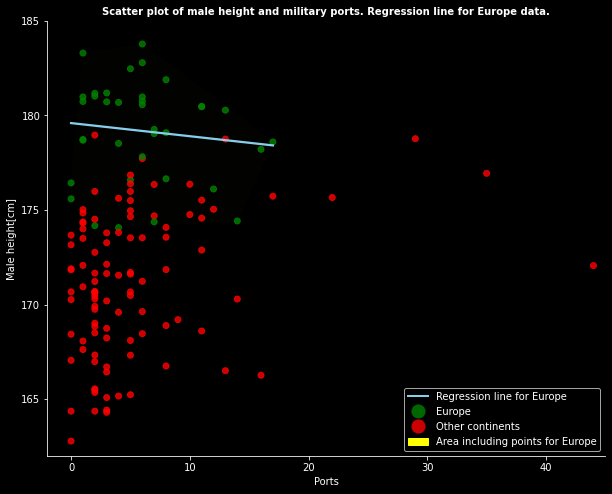

In [66]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.xlim([-2, 45])
plt.ylim([162, 185])

sns.regplot(x='Ports',
            y="Male height[cm]", 
            ci=None,
            data=df, 
            scatter = False,
            color = 'skyblue')


p2 = np.array(p)
hull = ConvexHull(p2)
ind = hull.vertices

hull_points = p2[ind, :]
plt.scatter(ports ,height, color = c, edgecolors = c , alpha = 0.8)
t = plt.fill(hull_points[:, 0], hull_points[:,1], alpha = 0, color = 'yellow')[0]

def animate(i):
    tmp = 0
    if 0 <= i <= 100:
        tmp = i/100
    else:
        tmp = (200 - i) / 100 
    t.set(alpha = tmp)
    return plt



################################################################################################################################



legend_elements = [Line2D([0], [0], color='skyblue', lw=2, label='Regression line for Europe'),
                   Line2D([0], [0], marker='o', color='black', label='Europe',
                          markerfacecolor='g', markersize=15, alpha = 0.8), 
                    Line2D([0], [0], marker='o', color='black', label='Other continents',
                          markerfacecolor='red', markersize=15, alpha = 0.8), 
                    Patch(facecolor='yellow', edgecolor='yellow',
                         label='Area including points for Europe')]
                   
    
ax.legend(handles=legend_elements, loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Scatter plot of male height and military ports. Regression line for Europe data.', fontsize = 10, fontweight = 'bold')
    

animation = FuncAnimation(fig, animate, frames = 200, interval = 30)
animation.save('10_Jablonska_280108.gif', dpi = 500, writer = PillowWriter(fps = 60))
plt.show()
